# Exam planning

To use this application, please complete the two Excel files called : "examparams.xlsx" and "professors.xlsx".

This app decide for you how to plan the exams. You give some input in the two mentionned Excel files and the program gives you some output on Julia or even in another Excel file.

We first load all the functions needed.

In [13]:
include("schedule_lib.jl")
using BenchmarkTools


We load the data from the Excel files.

In [14]:
students_filename = "examparams.xlsx"
prof_filename = "professors.xlsx"

function get_data()
    professors = import_prof(prof_filename)
    s = import_excel(students_filename,professors)
end

get_data (generic function with 1 method)

## Professors availability

We look how we can apply the availability of the professors.

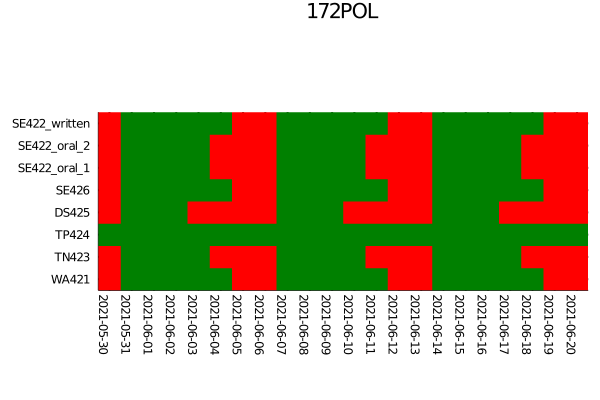

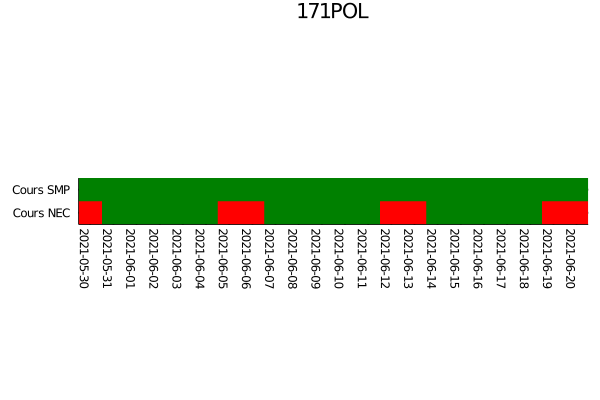

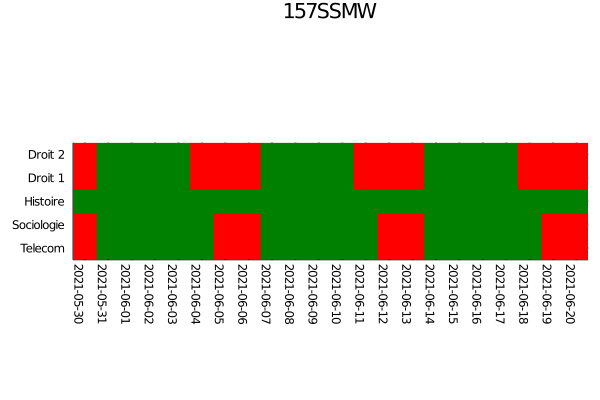

In [15]:
s = get_data()
full_filtering!(s)
s

## Constraints

We now look at how the constraints are applied.

The whole schedule is showed twice : once only with two applied dates to two different courses. Then after the constraints have been applied. 

Different thing may be noted :

- We see little changes for 171 POL and 157 SSMW because the two applied dates are for 172 POL exam schedule. But, because Lt-Col Coghe is teacher for TP424 and for the SMP exam, we see some new unavailable date in the exam schedule of 171 POL and 157SSMW. Same thing applies for Col Scheers and the courses TN423, NEC and telecom. For those teachers, 2 of their exams may take place the same day, but since TN423 and the two 171 POL exams are oral, this is not possible.
- After TN423, we see that there must be one day without exam before SE426. This is due to the fact that SE426 requires minimum 1 day of preparation. However, this is not the case for SE422, which requires also minimum one preparation day. This is due to the fact that TN423 and SE422 are both two days long. Assuming that every student attending to the first exam on the first day would do the same on the second exam, there is no free day needed. This student, for instance, would have his preparation day during the second day of TN423.
- The rest of the unavailable day sis easy to understand : it only depends on the number of preparation days and the length of the exam in days.


__Note:__ The previous remarks are only valid if you use the original .xlsx setup files.

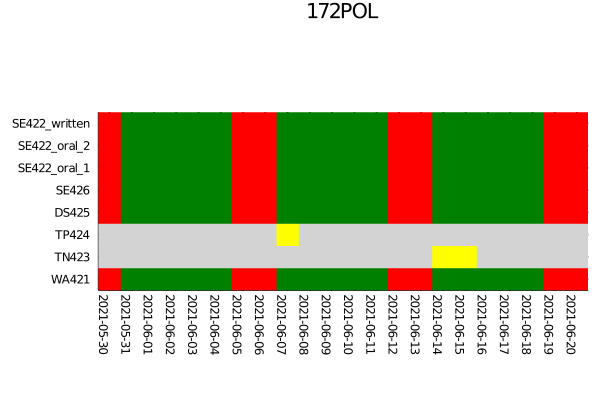

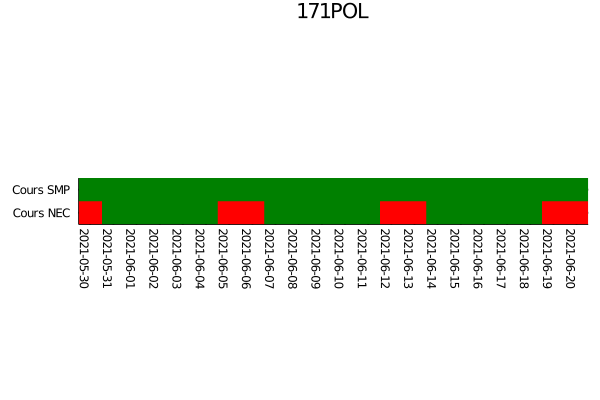

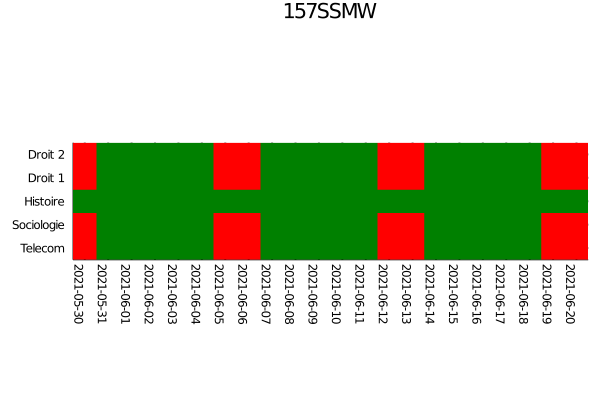

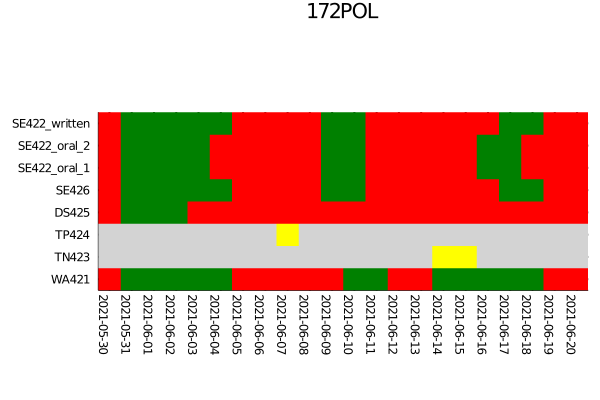

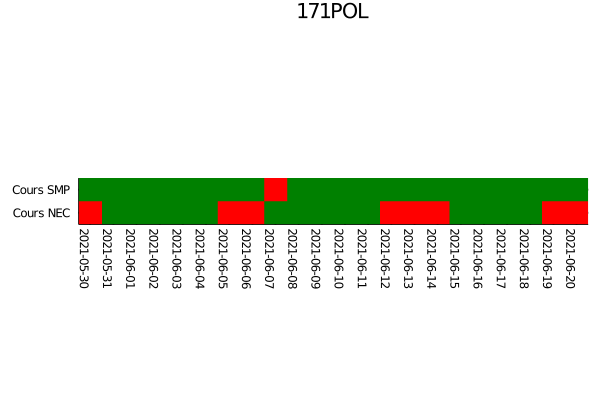

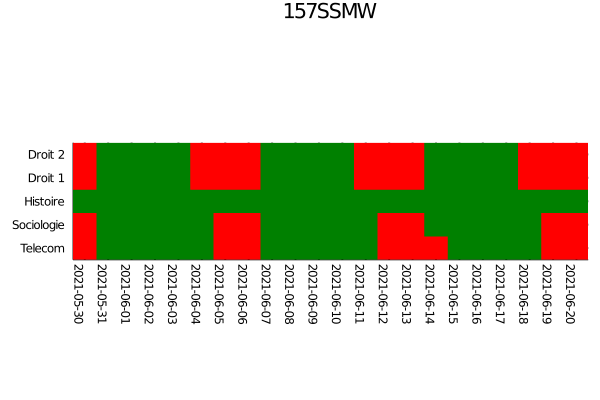

In [16]:
s = get_data()
setDate!(s,2, Date(2021,6,14))
setDate!(s,3, Date(2021,6,7))
print(s)
full_filtering!(s)
print(s)

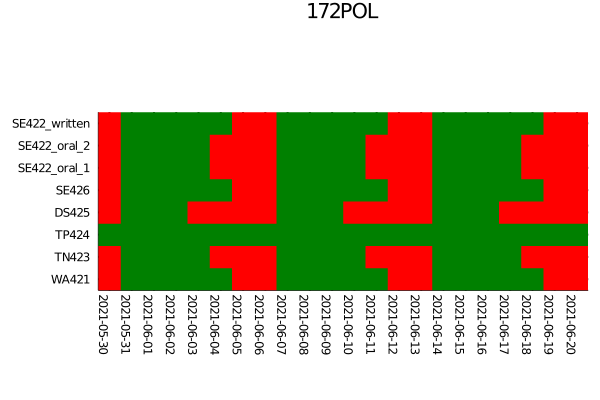

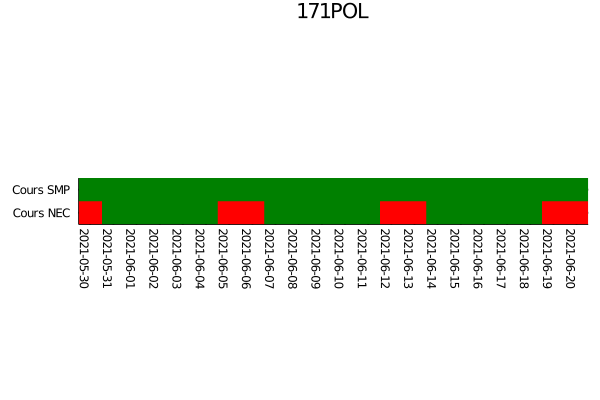

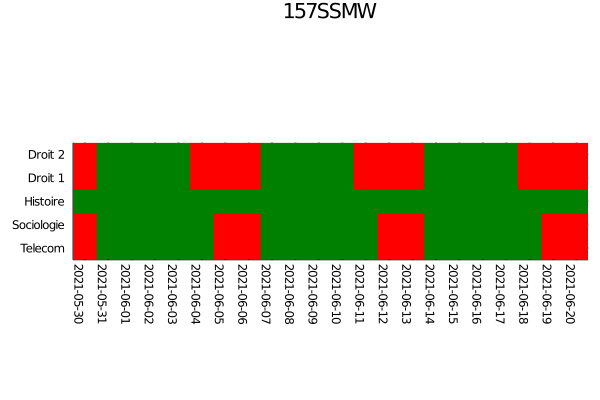

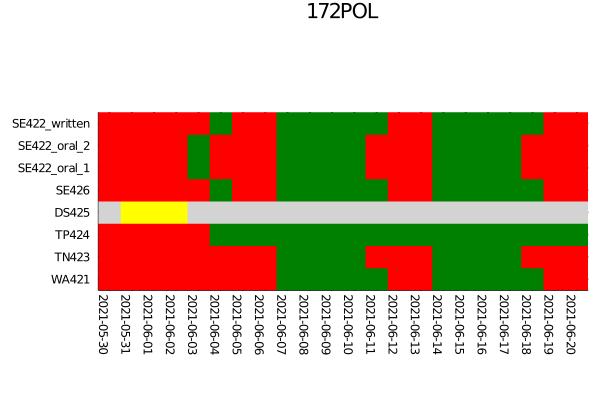

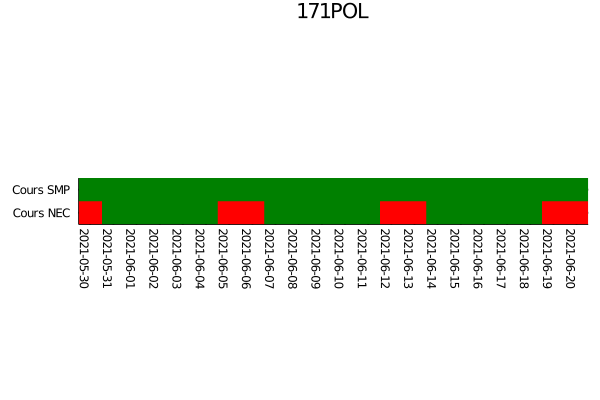

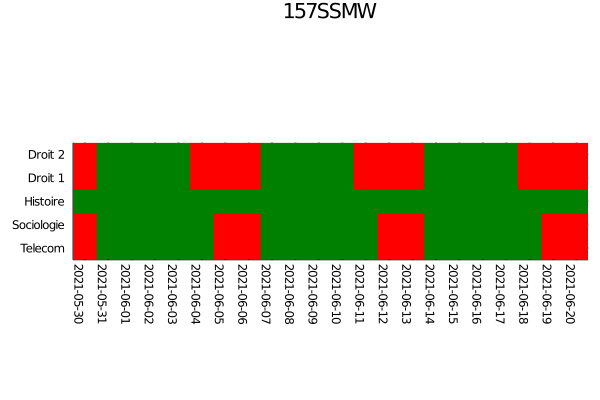

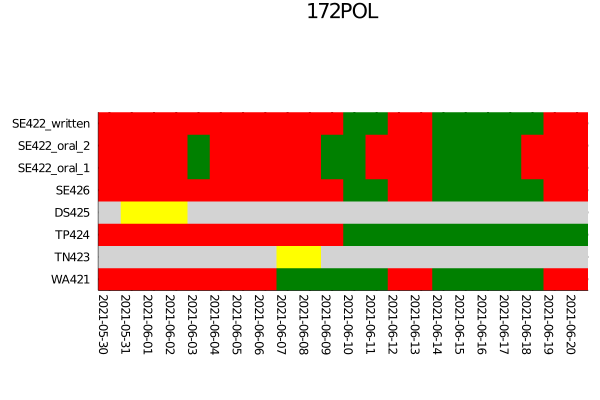

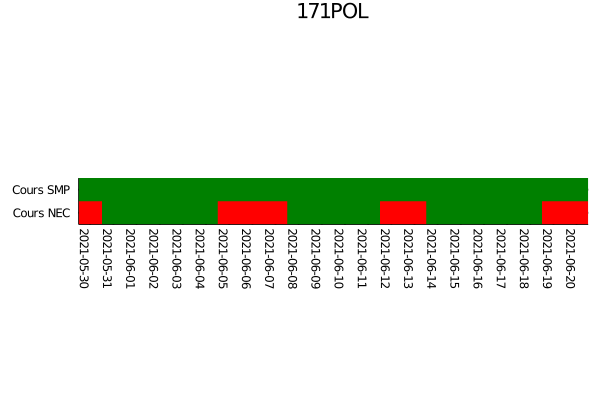

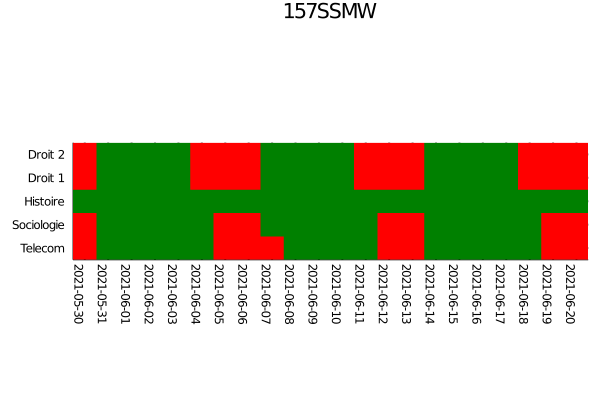

In [17]:
s=get_data()
full_filtering!(s)
print(s)
setDate!(s,4,Date(2021,5,31))
full_filtering!(s)
print(s)
setDate!(s,2,Date(2021,6,7))
full_filtering!(s)
print(s)

## The way to the final result

We now apply our implementation of the backtracking search. The processing time is also shown.
Some more benchmarking in Benchmarking.ipynb

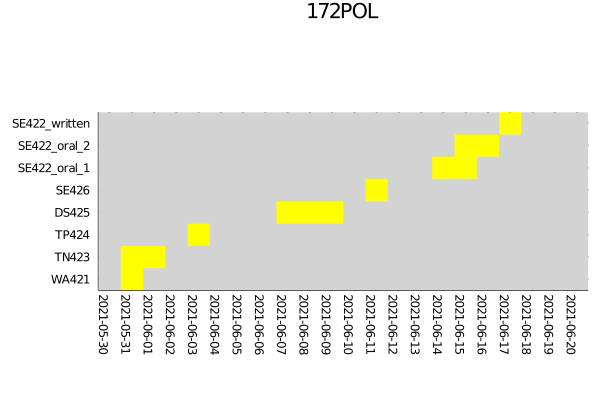

  0.020116 seconds (81.41 k allocations: 9.178 MiB)


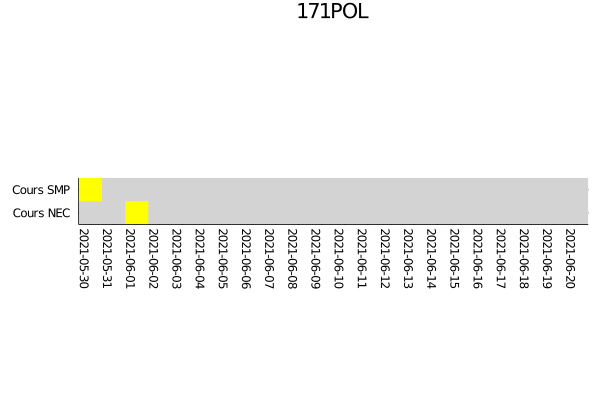

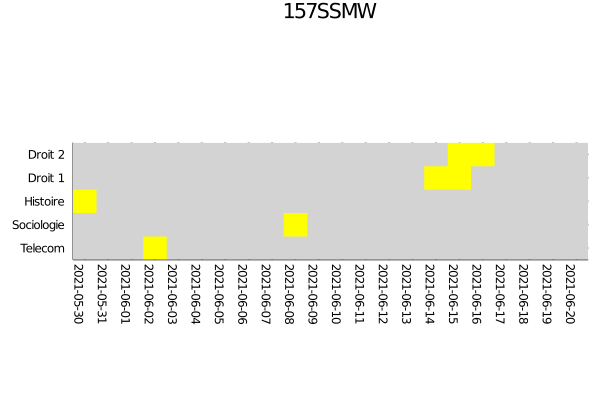

In [26]:
s = get_data()
@time s = backtracking_search(s)#,inference=full_filtering!)
println(s)

## Excel output

We know can output the results on an Excel file to have all the information together saved on a simple file.

In [19]:
export_excel(s,"OutputProgram")

Voici l'Excel que vous m'avez demandé !
